In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys
sys.path.append('..') 

import sample_words

In [4]:
# Sample attributes
pos_attributes = sample_words.pos_attributes
neg_attributes = sample_words.neg_attributes

In [5]:
# Import model
model = SentenceTransformer('BAAI/bge-large-en-v1.5')

In [6]:
embeddings_pos = model.encode(pos_attributes, normalize_embeddings=True)
embeddings_neg = model.encode(neg_attributes, normalize_embeddings=True)

In [31]:
# simple test
test0 = model.encode(["man"], normalize_embeddings=True)
test1 = model.encode(["woman"], normalize_embeddings=True)
testing = cosine_similarity(test0, test1)
print(testing[0][0])

0.74934554


In [34]:
#cos_sim = cosine_similarity(embeddings_pos, embeddings_neg)
cos_sim = cosine_similarity(embeddings_pos, embeddings_pos)
#cos_sim = cosine_similarity(embeddings_neg, embeddings_neg)

In [35]:
#df = pd.DataFrame(cos_sim, index=neg_attributes, columns = pos_attributes)
df = pd.DataFrame(cos_sim, index=pos_attributes, columns = pos_attributes)
#df = pd.DataFrame(cos_sim, index=neg_attributes, columns = neg_attributes)

Text(220.72222222222223, 0.5, 'Negative')

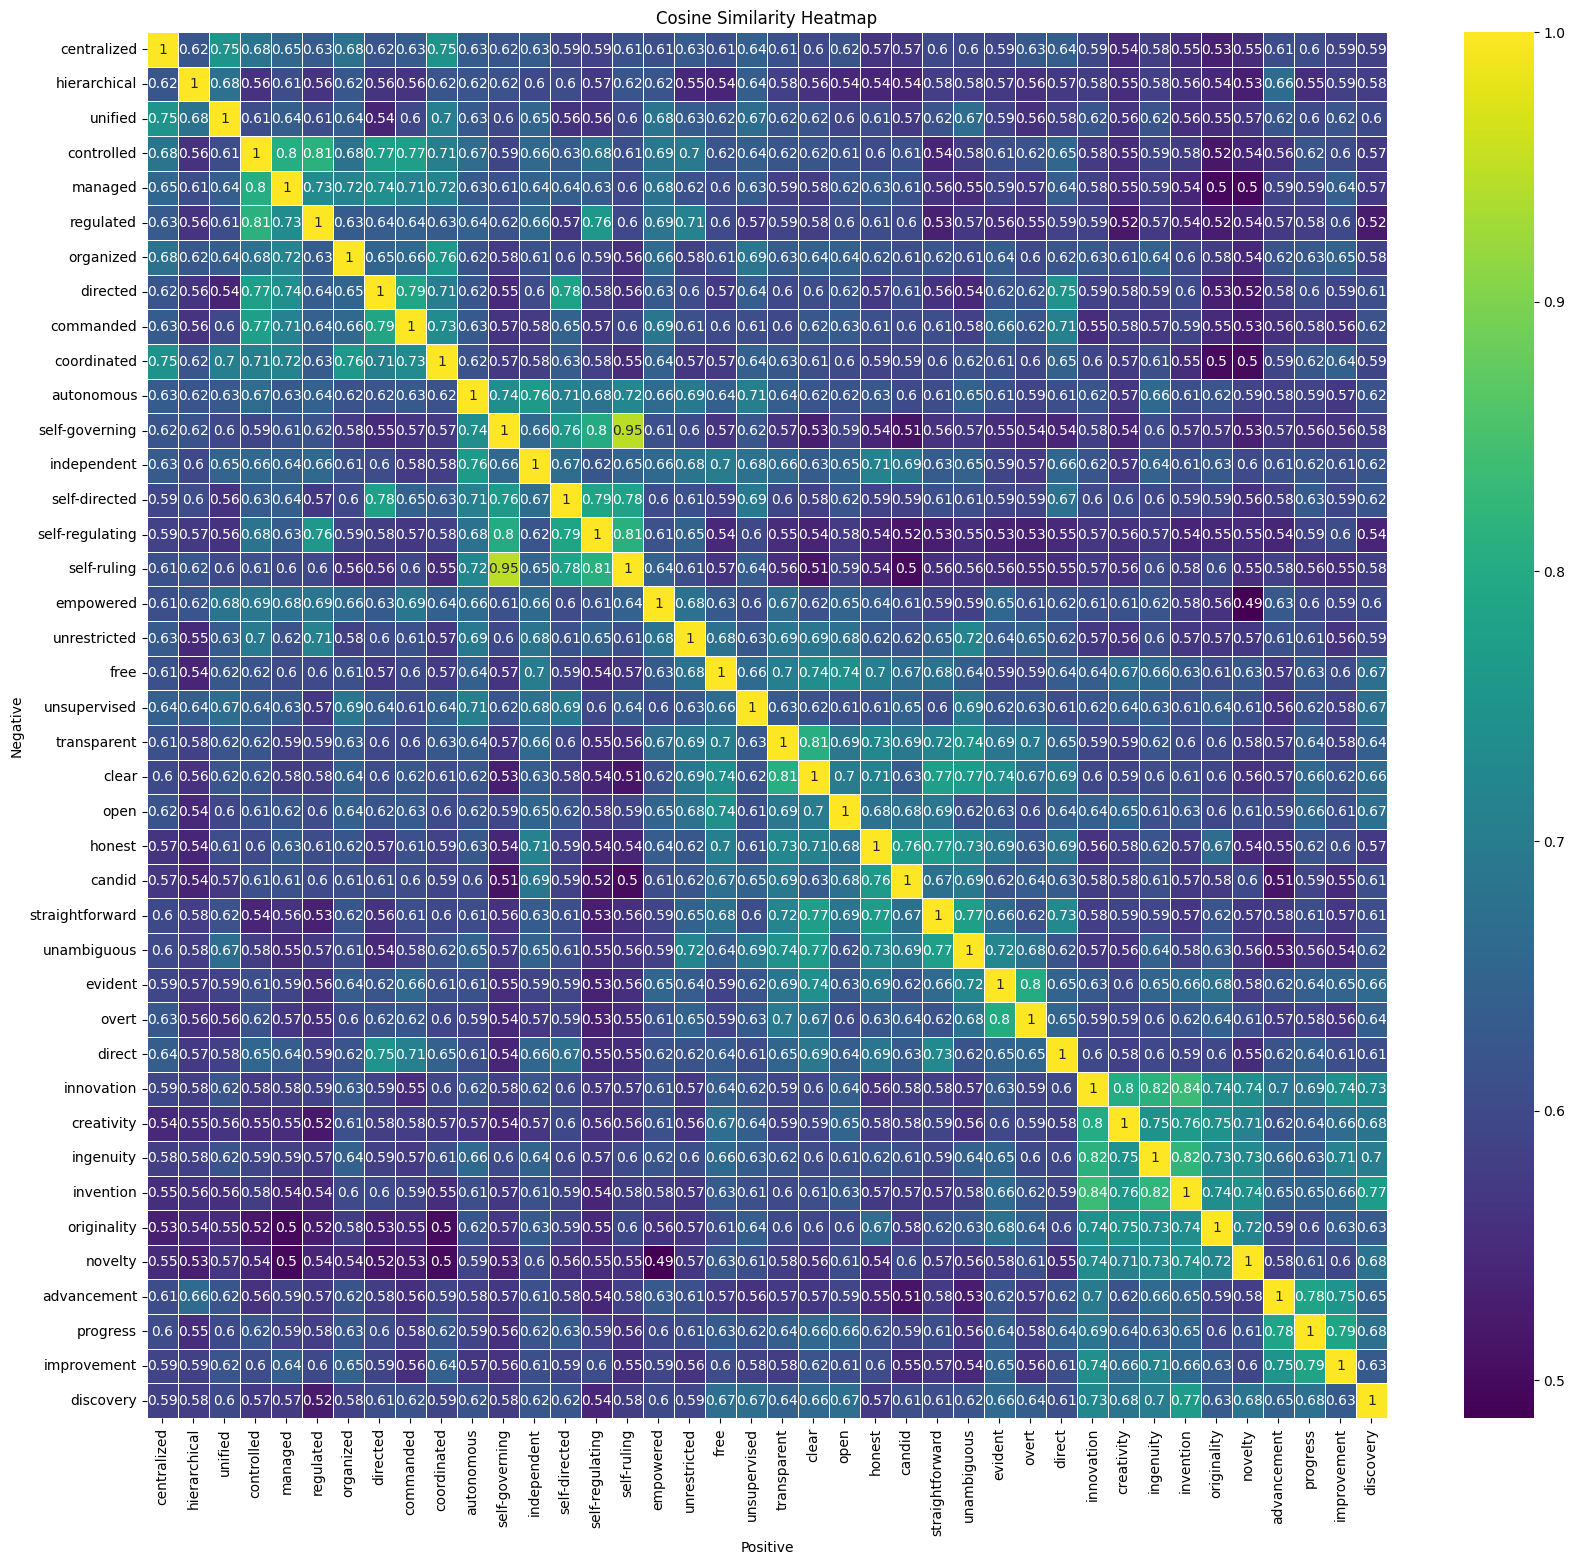

In [36]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 18))

# Create a heatmap using seaborn
sns.heatmap(df, annot=True, cmap='viridis', linewidths=.5, ax=ax)

# Customize the plot
ax.set_title('Cosine Similarity Heatmap')
ax.set_xlabel('Positive')
ax.set_ylabel('Negative')

